# <center>豆瓣图书分析</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
import re

### 1. 爬取某图书⽹网站，得到图书数据，并导入pandas

In [2]:
import pymysql

In [3]:
conn = pymysql.connect(host='localhost', user='root', password='1999.04.25', db='book', charset='utf8')

In [4]:
sql = 'select * from book;'
data = pd.read_sql(sql, conn)
data.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


In [5]:
data.tail()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
224630,419807,3869737,瑞典语三百句,王梦达|（瑞）Lars|Bergman,北京大学出版社,,2009-6-1,,平装,9787301152140,250 页,25.00元,None,24,8.2
224631,419810,4250737,大爭之世 卷四：大盜本色,,高寶,,2010年01月20日,,平裝,9789861854120,304,NTD260,大爭之世,55,7.3
224632,419814,11534920,三国机密（下）,马伯庸,江苏人民出版社,,2012-8,,平装,9787214086341,367,36.00元,三国机密,3585,7.9
224633,419815,21355149,不存在未出版的错误条目,,,,1900,,,9787102503042,,,None,29,7.5
224634,419816,25734399,锦衣夜行5·逍遥游,月关,湖北少年儿童出版社,,2013-7,,平装,9787535390264,289,25.00元,锦衣夜行,38,7.9


### 2. 对数据做清洗(缺失值与异常值)

#### 后面对数据进行分析时会涉及到年份(publication)、评分(score)、价格(price)、出版社(publisher)、作者(author)、评论数量(numberofreviews)
##### 每一个数据分析对数据的要求均不同，所以数据清洗我将在每一次数据分析之前单独进行一次清洗
#### 这里我只进行将全部都为空的数据清理掉的操作

In [6]:
data.isnull().sum()

id                 0
nid                0
title              0
author             0
publisher          0
translators        0
publication        0
originalname       0
framed             0
isbn               0
pagenumber         0
price              0
books              0
numberofreviews    0
score              0
dtype: int64

上面的结果说明没有一列所有数据全为空的数据

### 3. 分析书的数量与年份的关系

(1) 【缺失值】判断与清洗

In [7]:
data1 = data[(data['publication']!='') | (data['publication']!=None)]
len(data1)

224635

In [8]:
len(data)

224635

##### 上面的结果说明：所有数据都有年份这一列的数据，不需要进行数据【缺失值】的清洗

（2）数据【异常值】第一次清洗

In [9]:
i = 0
new_data = []
for year in data1.publication:
    year = str(year)
    if re.match('^.*?[0-9]{4}.*$', year)!=None:
        new_data.append(data1.iloc[i])
    i += 1
len(new_data)

218282

In [10]:
new_data1 = pd.DataFrame(new_data)
len(new_data1)

218282

In [11]:
new_data1.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


(3) 统一年份的格式

In [12]:
# 下面这一段代码获取书的年份并转为4位数字字符替换原来不同规则的年份，方便后面统计分析
publication = []
for year in new_data1.publication:
    yearstr = str(year)
    yearstr = re.search(r'^.*?([0-9]{4}).*$', yearstr).group(1)[:4]
    yearstr = int(yearstr)
    publication.append(yearstr)
print(len(publication))

218282


将new_data1中的 publication 替换成统一后的格式

In [13]:
new_data1['publication'] = publication
new_data1.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


（4）数据【异常值】第二次清洗--对年份进行限制

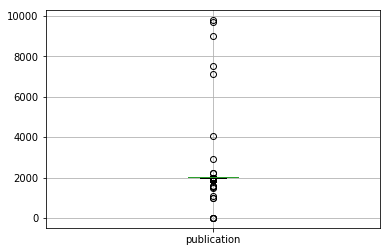

In [14]:
new_data1[['publication']].boxplot()
plt.show()

由上面的箱线图我们知道：有部分数据的年份存在问题，我们需要除去这部分数据

In [15]:
data1 = new_data1[(new_data1['publication']<=2018) & (new_data1['publication']>=1920)]
len(data1)

217746

In [16]:
data1.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


（5）开始分析年份与数量之间的关系

In [17]:
x = np.arange(1920, 2019)      # 用来作为所有年份
x

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [18]:
y = np.zeros(2019-1920, dtype=int)     # 用y来代替每一年书籍的数量，初始值每年都为0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
len(x)

99

In [20]:
len(y)

99

In [21]:
for n in data1['publication']:
    index = 0
    for x_data in x:
        if n==x_data:
            y[index] += 1
        index += 1

In [22]:
y

array([    1,     1,     0,     2,     2,     2,     0,     4,     5,
           3,     5,     3,     1,     2,     3,     3,     5,     5,
           4,     1,     2,     2,     1,     1,     4,     1,     3,
           3,     1,    10,    12,     6,    11,    21,    25,    40,
          79,   103,   120,   111,    50,    56,   103,    90,    53,
          72,    42,    25,    21,    34,   395,    48,    72,   120,
          92,   108,   119,   138,   232,   419,   456,   603,   603,
         716,   744,   755,   786,   873,   941,   941,   841,  1039,
        1211,  1260,  1426,  1533,  2204,  2717,  3520,  3841,  4411,
        5174,  6498,  8293, 10541, 12292, 13636, 14525, 14925, 15691,
       15635, 15462, 13433, 10658,  8742,  7672,  6666,  3420,   165])

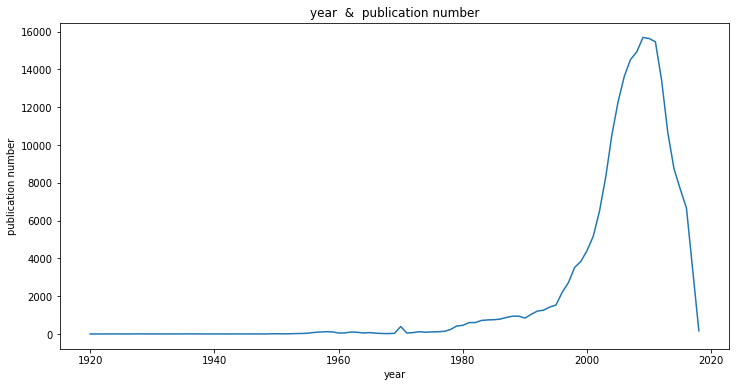

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.title('year  &  publication number')
plt.xlabel('year')
plt.ylabel('publication number')
plt.show()

##### 结论：
从上图可知书的数量与年份之间的关系。自1920年到1970年左右书籍基本保持每年固定数量，1970年开始，书籍进入增长期，尤其是2000年到2010年左右的书籍疯狂增长。<br>
从2010年开始，书籍发行量开始下降，可能的原因如下：<br>
(1) 电子书的普及，导致发行版本的书籍开始减少；<br>
(2) 部分书籍豆瓣目前还未收录。

### 4. 分析书籍的评分与年代之间是否有某种关系

##### 分析：
根据年份，获取所有这个年份的书籍，将这些书籍聚集起来，算出他们的平均分，作为这一年份的书籍的评分。<br>
根据这种思路，获取从1920年到2018年每一年的评分，最后画出书籍评分与年代的关系图<br>
因为涉及到年份，我们可以直接用上一个分析中已经对年份进行过筛选的数据进行拷贝使用。

（1）拷贝一份处理过年份的数据

In [24]:
data2 = data1.copy()
data2.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


（2）数据清洗，处理score评分项缺失和异常值

In [25]:
data2 = data2[(data2['score']!='')]     # 去掉没有评分的数据
data2.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5
5,7,1002262,宋元戏曲史,王国维,上海古籍出版社,,1998,,平装,9787532524884,167,12.00元,蓬莱阁丛书,436,9.0


In [26]:
len(data2)

149345

In [27]:
scores = []
for score in data2['score']:
    score = float(score)
    scores.append(score)
data2['score'] = scores
len(scores)

149345

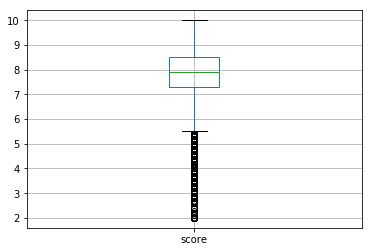

In [28]:
data2[['score']].boxplot()
plt.show()

根据上面的箱线图，有很大一部分评分超出极限值，考虑到数据的准确性，这里就不再删除这部分数据了<br>
只对评分判断一下最高分和最低分

In [29]:
data2 = data2[(data2['score']>0) & (data2['score']<=10)]

In [30]:
len(data2)

149345

与上面相同，说明data2中所有数据都正常，无异常值

（3）获取每一年所有书籍评分的平均值

In [31]:
x

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [32]:
y_score = np.zeros(2019-1920)
y_score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
y_num = np.zeros(2019-1920, dtype=int)
y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
data2.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5
5,7,1002262,宋元戏曲史,王国维,上海古籍出版社,,1998,,平装,9787532524884,167,12.00元,蓬莱阁丛书,436,9.0


In [35]:
data2.index = range(len(data2))    # 重置index

In [36]:
data2.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,6,1134261,唐宋词史论,王兆鹏,\n,,2000,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5
4,7,1002262,宋元戏曲史,王国维,上海古籍出版社,,1998,,平装,9787532524884,167,12.00元,蓬莱阁丛书,436,9.0


In [37]:
%%time
publication2 = data2['publication']
for m in range(len(data2)):
    print(publication2[m])
    break

2002
CPU times: user 8.76 ms, sys: 3.37 ms, total: 12.1 ms
Wall time: 10.8 ms


In [38]:
publication2 = data2['publication']
score2 = data2['score']
print(len(publication2))
print(len(score2))

149345
149345


In [39]:
%%time
for m in range(len(data2)):
    index = 0
    for x_data in x:
        if publication2[m] == x_data:
            y_score[index] += score2[m]
            y_num[index] += 1
        index += 1

CPU times: user 2min 40s, sys: 270 ms, total: 2min 41s
Wall time: 2min 41s


In [40]:
y_score

array([7.80000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00, 1.43000e+01,
       9.10000e+00, 7.60000e+00, 0.00000e+00, 7.80000e+00, 7.40000e+00,
       0.00000e+00, 8.00000e+00, 1.62000e+01, 1.63000e+01, 0.00000e+00,
       8.70000e+00, 8.10000e+00, 0.00000e+00, 7.70000e+00, 8.00000e+00,
       8.70000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.53000e+01,
       2.31000e+01, 2.68000e+01, 3.43000e+01, 5.23000e+01, 9.85000e+01,
       1.15000e+02, 3.44900e+02, 3.39600e+02, 6.08200e+02, 4.54200e+02,
       2.26800e+02, 2.32800e+02, 4.85500e+02, 4.30900e+02, 1.89200e+02,
       1.90900e+02, 1.00900e+02, 7.50000e+01, 5.41000e+01, 1.17700e+02,
       1.42730e+03, 2.21900e+02, 2.36800e+02, 5.20900e+02, 3.68900e+02,
       3.84800e+02, 4.52500e+02, 4.54800e+02, 1.19630e+03, 2.37170e+03,
       2.49630e+03, 3.23960e+03, 2.78980e+03, 3.31770e+03, 3.44910e+03,
       3.63210e+03, 3.60170e+03, 4.09330e+03, 3.98470e+03, 3.778

In [41]:
y_num

array([    1,     0,     0,     0,     0,     0,     0,     0,     1,
           2,     1,     1,     0,     1,     1,     0,     1,     2,
           2,     0,     1,     1,     0,     1,     1,     1,     0,
           0,     0,     4,     3,     3,     4,     6,    12,    14,
          41,    39,    73,    54,    27,    27,    57,    51,    23,
          23,    12,     9,     6,    14,   188,    26,    30,    63,
          45,    48,    54,    56,   140,   278,   295,   389,   331,
         398,   411,   439,   433,   498,   492,   461,   432,   566,
         646,   658,   842,   878,  1336,  1707,  2259,  2428,  2813,
        3372,  4235,  5586,  7263,  8735,  9766, 10438, 10707, 11248,
       11084, 10608,  9197,  7624,  6251,  5475,  4830,  2647,   119])

因为除数不能为0，所以我将个数为0的全置为1，对求平均值不影响

In [42]:
index = 0
for i in y_num:
    if i==0:
        y_num[index] = 1
    index += 1
y_num

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           2,     1,     1,     1,     1,     1,     1,     1,     2,
           2,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     4,     3,     3,     4,     6,    12,    14,
          41,    39,    73,    54,    27,    27,    57,    51,    23,
          23,    12,     9,     6,    14,   188,    26,    30,    63,
          45,    48,    54,    56,   140,   278,   295,   389,   331,
         398,   411,   439,   433,   498,   492,   461,   432,   566,
         646,   658,   842,   878,  1336,  1707,  2259,  2428,  2813,
        3372,  4235,  5586,  7263,  8735,  9766, 10438, 10707, 11248,
       11084, 10608,  9197,  7624,  6251,  5475,  4830,  2647,   119])

In [43]:
y2 = y_score/y_num
y2

array([7.8       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 9.        , 7.15      ,
       9.1       , 7.6       , 0.        , 7.8       , 7.4       ,
       0.        , 8.        , 8.1       , 8.15      , 0.        ,
       8.7       , 8.1       , 0.        , 7.7       , 8.        ,
       8.7       , 0.        , 0.        , 0.        , 8.825     ,
       7.7       , 8.93333333, 8.575     , 8.71666667, 8.20833333,
       8.21428571, 8.41219512, 8.70769231, 8.33150685, 8.41111111,
       8.4       , 8.62222222, 8.51754386, 8.44901961, 8.22608696,
       8.3       , 8.40833333, 8.33333333, 9.01666667, 8.40714286,
       7.59202128, 8.53461538, 7.89333333, 8.26825397, 8.19777778,
       8.01666667, 8.37962963, 8.12142857, 8.545     , 8.53129496,
       8.4620339 , 8.32802057, 8.42839879, 8.33592965, 8.3919708 ,
       8.27357631, 8.31801386, 8.21947791, 8.09898374, 8.1967462 ,
       8.29490741, 8.32031802, 8.23065015, 8.20699088, 8.26460

（4）画图

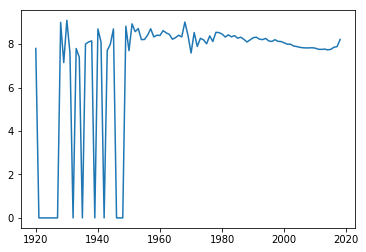

In [44]:
plt.plot(x, y2)
plt.show()

由于1950年之前很多年没有评分，都为0，导致数据不稳定，下面我们从1950年开始进行数据分析

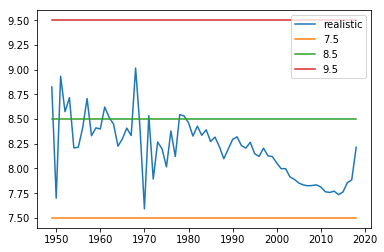

In [45]:
plt.plot(x[-70:], y2[-70:], label='realistic')
plt.plot(x[-70:], np.full(70, 7.5), label='7.5')
plt.plot(x[-70:], np.full(70, 8.5), label='8.5')
plt.plot(x[-70:], np.full(70, 9.5), label='9.5')
plt.legend()
plt.show()

##### 结论：
从上图可以看出<br>
（1）2000年之前出版的书籍评分相对较高一点。可能是因为2000年后书籍泛滥，导致书籍内容的质量不高，所以评分相对要低一些；<br>
（2）从1980年开始，后期的书籍评分几乎一直在降低，可能是书籍内容质量降低导致；<br>
（3）大概从2015年开始，书籍的评分有所上升，可能是电子书籍增多，纸质书更加注重内容的质量了，所以评分有所提高。<br>

### 5. 书籍的价格⼀般都是在什么范围

In [46]:
data.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


（1）对价格这一列的数据进行清洗

In [47]:
data3 = data.copy()

先取出价格为空的数据

In [48]:
data3['price'].isnull().sum()

0

In [49]:
(data3['price']=='').sum()

11079

In [50]:
data3 = data3[(data3['price']!='')]
len(data3)

213556

In [51]:
data3.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


去除掉价格列表示不规范导致无法处理的数据

In [52]:
i = 0
new_data3 = []
for price in data3['price']:
    price = str(price)
    if re.match(r'.*?[0-9]+\.{0,1}[0-9]*.*?', price) != None:
        new_data3.append(data3.iloc[i])
#     else:
#         print(price)
    i += 1
len(new_data3)

213433

In [53]:
new_data3 = pd.DataFrame(new_data3)
len(new_data3)

213433

（2）统一价格这一列的格式

In [54]:
# 下面这一段代码获取书的年份并转为4位数字字符替换原来不同规则的年份，方便后面统计分析
new_prices = []
for price in new_data3.price:
    pricestr = str(price)
    pricestr = re.search(r'^.*?([0-9]+\.{0,1}[0-9]*).*$', pricestr).group(1)
    try:
        pricestr = float(pricestr)
    except:
        print(pricestr)
    new_prices.append(pricestr)
len(new_prices)

213433

In [55]:
new_data3['price'] = new_prices

In [56]:
new_data3.tail()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
224629,419806,1926747,德语速成,翟永庚,译林出版社,,2006-11,,简裝本,9787806577660,612,36.0,None,24,8.0
224630,419807,3869737,瑞典语三百句,王梦达|（瑞）Lars|Bergman,北京大学出版社,,2009-6-1,,平装,9787301152140,250 页,25.0,None,24,8.2
224631,419810,4250737,大爭之世 卷四：大盜本色,,高寶,,2010年01月20日,,平裝,9789861854120,304,260.0,大爭之世,55,7.3
224632,419814,11534920,三国机密（下）,马伯庸,江苏人民出版社,,2012-8,,平装,9787214086341,367,36.0,三国机密,3585,7.9
224634,419816,25734399,锦衣夜行5·逍遥游,月关,湖北少年儿童出版社,,2013-7,,平装,9787535390264,289,25.0,锦衣夜行,38,7.9


（3）对价格数据异常值进行判断和处理

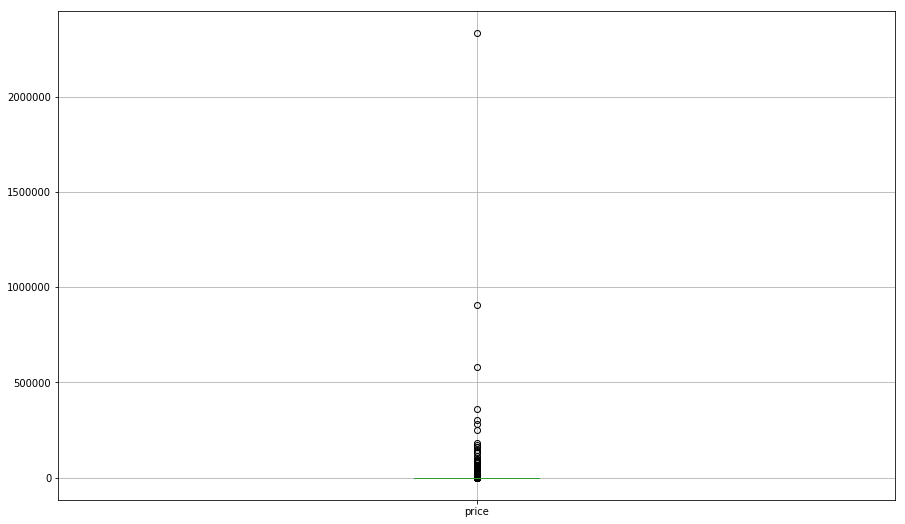

In [57]:
plt.figure(figsize=(15,9))
new_data3[['price']].boxplot()
plt.show()

In [58]:
prices = new_data3['price']

In [59]:
q_upper = prices.quantile(0.75)
q_upper

60.0

In [60]:
q_lower = prices.quantile(0.25)
q_lower

22.0

In [61]:
val = q_upper - q_lower
val

38.0

In [62]:
k = 1.5

In [63]:
new_data3 = new_data3[(new_data3['price'] < q_upper + k * val) & (new_data3['price'] > q_lower - k * val )]
len(new_data3)

182138

In [64]:
prices = new_data3['price']

(array([16706., 39913., 57503., 27461., 15836.,  9464.,  4798.,  4312.,
         4627.,  1518.]),
 array([  0.   ,  11.695,  23.39 ,  35.085,  46.78 ,  58.475,  70.17 ,
         81.865,  93.56 , 105.255, 116.95 ]),
 <a list of 10 Patch objects>)

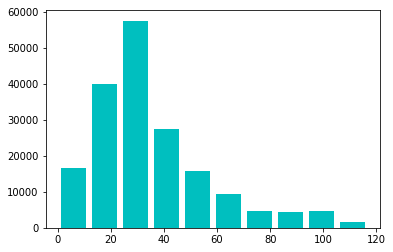

In [65]:
plt.hist(prices, color='c', rwidth=0.8)

In [66]:
import math
bins = math.ceil((prices.max() - prices.min())/10)
bins

12

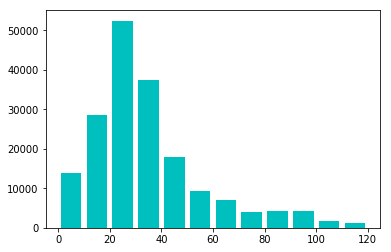

In [67]:
res = plt.hist(prices, color='c', rwidth=0.8, range=(0, 10*bins), bins=bins)
plt.show()

In [68]:
res

(array([13971., 28549., 52399., 37361., 17833.,  9392.,  6999.,  4097.,
         4339.,  4267.,  1825.,  1106.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120.]),
 <a list of 12 Patch objects>)

##### 结论：从上面的图和数据可知：大部分书的价格在0-60之间，其中20-30最多。

## 6、出版的书籍最多的前20个出版社

In [69]:
data4 = data.copy()

In [70]:
data4.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


In [71]:
data4['publisher'].isnull().sum()

0

In [72]:
(data4['publisher'] == '').sum()

16593

In [73]:
data4 = data4[data4['publisher'] != '']
len(data4)

208042

In [74]:
publisher_num = data4.drop_duplicates(['publisher'])    # 筛选出版社不重复的一组数据

In [75]:
publisher_num.tail()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
224578,419611,1904607,匿龙密语 1,小云,冬日社,,2005,,,9789889940003,,HK 30,None,59,9.4
224598,419663,3890046,水神的新娘 1,尹美庚|윤미경,서울 문화사,,2006-6-2,하백의 신부 1,,9788953272491,,,None,165,7.3
224606,419686,21319773,禁じられた戯び,山藍紫姫子|蘭丸,花丸文庫black,,2013-3,,,9784592851011,,690,None,39,8.6
224617,419743,2075618,身體·性別·階級,劉苑如,中國文哲研究所,,2002-12-31,,25開 1冊,9789576719288,241,NT$320元,None,,
224627,419801,26919515,Rivstart A1+A2 Textbok,Paula Levy Scherrer|Karl Lindemalm,Natur&Kultur,,2014,,Paperback,9789127434202,240,,None,,


In [76]:
publisher_num.index = np.arange(len(publisher_num)) # 重置目录

In [77]:
publisher_num.tail()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
13538,419611,1904607,匿龙密语 1,小云,冬日社,,2005,,,9789889940003,,HK 30,None,59,9.4
13539,419663,3890046,水神的新娘 1,尹美庚|윤미경,서울 문화사,,2006-6-2,하백의 신부 1,,9788953272491,,,None,165,7.3
13540,419686,21319773,禁じられた戯び,山藍紫姫子|蘭丸,花丸文庫black,,2013-3,,,9784592851011,,690,None,39,8.6
13541,419743,2075618,身體·性別·階級,劉苑如,中國文哲研究所,,2002-12-31,,25開 1冊,9789576719288,241,NT$320元,None,,
13542,419801,26919515,Rivstart A1+A2 Textbok,Paula Levy Scherrer|Karl Lindemalm,Natur&Kultur,,2014,,Paperback,9789127434202,240,,None,,


In [78]:
publishers = publisher_num['publisher']    # 获取到所有出版社的一个列表

In [79]:
type(publishers)

pandas.core.series.Series

In [80]:
publishers[0]

'中国社会科学出版社'

In [81]:
num_of_publishers = np.zeros(len(publishers), dtype=int)
num_of_publishers

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
%%time
for one in data4['publisher']:
    index = 0
    for publisher in publishers:
        if one == publisher:
            num_of_publishers[index] += 1 
        index += 1

CPU times: user 11min 4s, sys: 1.83 s, total: 11min 6s
Wall time: 11min 10s


In [83]:
num_of_publishers

array([1490, 3233, 1717, ...,    1,    1,    1])

In [88]:
nums = num_of_publishers.copy()

In [94]:
nums

array([1490, 3233, 1717, ...,    1,    1,    1])

In [97]:
list_nums = list(nums)   # 将nparray转为list，方便后面选取最大的20个数的索引下标
list_nums[:5]

[1490, 3233, 1717, 174, 736]

In [ ]:
下面通过使用 heapq 找出最大的20个数的索引下标

In [111]:
import heapq
# 最大的20个数的索引
max_num_index_list = map(list_nums.index, heapq.nlargest(20, list_nums))
max_num_index_list = list(max_num_index_list)

In [115]:
print(max_num_index_list)

[1, 112, 22, 12, 81, 110, 1090, 36, 101, 19, 24, 203, 104, 38, 2, 51, 151, 56, 0, 141]


首先，根据排序后前20的索引获取排前20的所有出版社

In [119]:
publishers_list =[]
for i in max_num_index_list:
    publishers_list.append(publishers[i])
print(publishers_list)

['人民文学出版社', '北京大学出版社', '商务印书馆', '中华书局', '中信出版社', '上海译文出版社', '東立', '中国人民大学出版社', '上海人民出版社', '机械工业出版社', '广西师范大学出版社', '译林出版社', '人民邮电出版社', '生活·读书·新知三联书店', '上海古籍出版社', '新星出版社', '清华大学出版社', '电子工业出版社', '中国社会科学出版社', '社会科学文献出版社']


然后，根据排序后前20的索引获取排前20的所有出版社的出版书籍量

In [120]:
publish_num_list =[]
for i in max_num_index_list:
    publish_num_list.append(num_of_publishers[i])
print(publish_num_list)

[3233, 3214, 2904, 2749, 2522, 2514, 2321, 2212, 2211, 2174, 1983, 1849, 1813, 1758, 1717, 1663, 1643, 1599, 1490, 1248]


开始画图

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


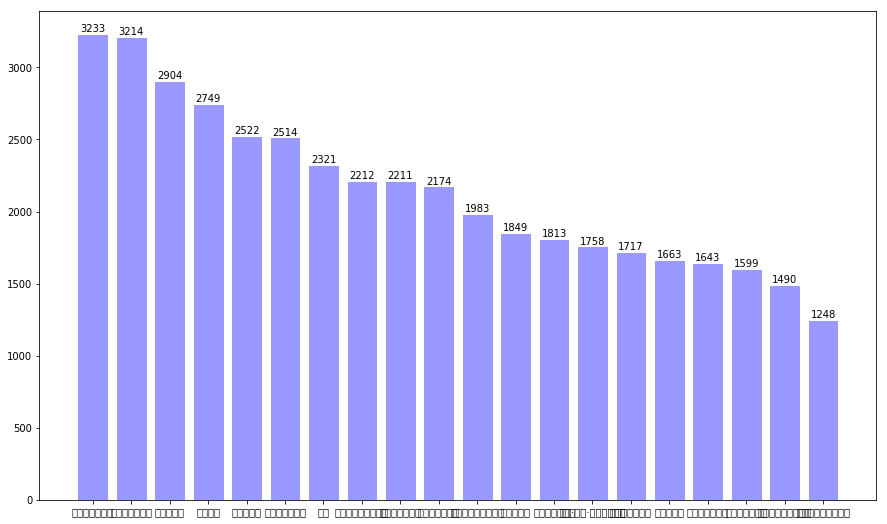

In [137]:
# plt.rc('font', **{'family' : 'HiraginoSansGB-W3, PingFangSC-Regular, Microsoft YaHei, SimHe'})
plt.figure(figsize=(15, 9))
plt.bar(publishers_list, publish_num_list, facecolor='#9999ff', edgecolor='white')
for x, y in zip(publishers_list, publish_num_list):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y, '%d' % y, ha='center', va='bottom')
plt.show()

由于Mac系统的原因，设置后也不能正常显示中文，所以下面我将20个出版社依次排出👇

In [133]:
publishers_list

['人民文学出版社',
 '北京大学出版社',
 '商务印书馆',
 '中华书局',
 '中信出版社',
 '上海译文出版社',
 '東立',
 '中国人民大学出版社',
 '上海人民出版社',
 '机械工业出版社',
 '广西师范大学出版社',
 '译林出版社',
 '人民邮电出版社',
 '生活·读书·新知三联书店',
 '上海古籍出版社',
 '新星出版社',
 '清华大学出版社',
 '电子工业出版社',
 '中国社会科学出版社',
 '社会科学文献出版社']

## 7. 书籍评分比较高的出版社

##### 分析
这个分析涉及评分和出版社，出版社可以直接使用上一个分析中得到的所有不重复出版社的20个数据<br>
评分可以和 4 中的一样，采用求加权平均评分的方式。<br>
评分这里一列的数据可以直接使用 4 中的已经清洗过评分后的 data2 的数据。

In [144]:
data5 = data2.copy()
len(data5)

149345

In [141]:
len(publishers)    # 所有不重复的出版社

13543

到这里，我们获取到了所有有评分的总数据、所有出版社的名称<br>
下一步，我们将统计每一个出版社的平均评分

In [168]:
y_score5 = np.zeros(len(publishers_list))
y_score5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [169]:
y_num5 = np.zeros(len(publishers_list), dtype=int)
y_num5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [170]:
publishers5 = data5['publisher']  # 所有数据中的出版社列
score5 = data5['score']     # 所有数据中的评分列
print(len(publishers5))
print(len(score5))

149345
149345


In [171]:
%%time
for m in range(len(score5)):
    index = 0
    for x in publishers_list:
        if publishers5[m] == x:
            y_score5[index] += score5[m]
            y_num5[index] += 1
        index += 1

CPU times: user 31.3 s, sys: 51.8 ms, total: 31.4 s
Wall time: 31.5 s


In [173]:
y_score5

array([23572.4, 19307.5, 16789.4, 17193.8, 17977.4, 18708.5, 13580.1,
       13497.2, 14339.2, 11704.8, 14206. , 14025.7, 11288.9, 13243.9,
        9666.3, 12373.5,  7992.1,  8554.5,  6350.7,  5614.3])

In [174]:
y_num5

array([2911, 2434, 2067, 2081, 2369, 2298, 1594, 1729, 1806, 1529, 1806,
       1741, 1442, 1637, 1154, 1622, 1033, 1134,  806,  727])

因为除数不能为0，所以我将个数为0的全置为1，对求平均值不影响

In [175]:
index = 0
for i in y_num5:
    if i==0:
        y_num5[index] = 1
    index += 1
y_num5

array([2911, 2434, 2067, 2081, 2369, 2298, 1594, 1729, 1806, 1529, 1806,
       1741, 1442, 1637, 1154, 1622, 1033, 1134,  806,  727])

求取每一个出版社的平均分

In [176]:
y5 = y_score5/y_num5
y5

array([8.09769839, 7.93241578, 8.12259313, 8.26227775, 7.58860279,
       8.14120975, 8.51951066, 7.80636206, 7.93975637, 7.65519948,
       7.86600221, 8.05611717, 7.82864078, 8.0903482 , 8.37634315,
       7.62854501, 7.73678606, 7.54365079, 7.8792804 , 7.72255846])

In [182]:
y5_list = list(y5)   # 将nparray转为list，方便后面选取最大的20个数的索引下标
import heapq
# 最大的20个数的索引
y5_list_index = map(y5_list.index, heapq.nlargest(20, y5_list))
y5_list_index = list(y5_list_index)
y5_list_index

[6, 14, 3, 5, 2, 0, 13, 11, 8, 1, 18, 10, 12, 7, 16, 19, 9, 15, 4, 17]

In [184]:
print(publishers_list)

['人民文学出版社', '北京大学出版社', '商务印书馆', '中华书局', '中信出版社', '上海译文出版社', '東立', '中国人民大学出版社', '上海人民出版社', '机械工业出版社', '广西师范大学出版社', '译林出版社', '人民邮电出版社', '生活·读书·新知三联书店', '上海古籍出版社', '新星出版社', '清华大学出版社', '电子工业出版社', '中国社会科学出版社', '社会科学文献出版社']


首先，根据排序后前20的索引获取排前20的所有出版社

In [185]:
new_publishers_list =[]
for i in y5_list_index:
    new_publishers_list.append(publishers_list[i])
print(new_publishers_list)

['東立', '上海古籍出版社', '中华书局', '上海译文出版社', '商务印书馆', '人民文学出版社', '生活·读书·新知三联书店', '译林出版社', '上海人民出版社', '北京大学出版社', '中国社会科学出版社', '广西师范大学出版社', '人民邮电出版社', '中国人民大学出版社', '清华大学出版社', '社会科学文献出版社', '机械工业出版社', '新星出版社', '中信出版社', '电子工业出版社']


然后，根据排序后前20的索引获取排前20的所有出版社的出版书籍量

In [187]:
new_y5 =[]
for i in y5_list_index:
    new_y5.append(y5[i])
print(new_y5)

[8.519510664993696, 8.376343154246106, 8.262277751081205, 8.141209747606602, 8.122593130140281, 8.097698385434532, 8.090348197923024, 8.056117174037892, 7.939756367663341, 7.932415776499564, 7.879280397022335, 7.866002214839434, 7.828640776699034, 7.80636205899363, 7.736786060019366, 7.7225584594222845, 7.655199476782215, 7.6285450061652345, 7.588602785985649, 7.5436507936507935]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


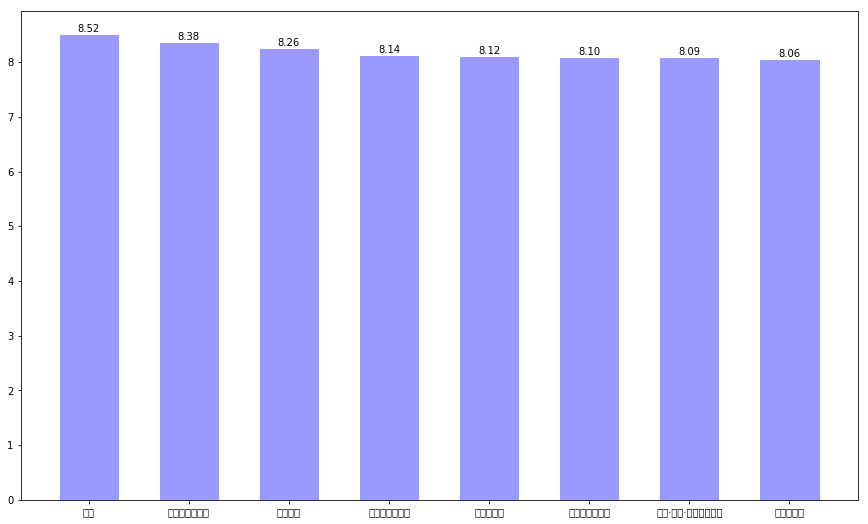

In [195]:
# plt.rc('font', **{'family' : 'HiraginoSansGB-W3, PingFangSC-Regular, Microsoft YaHei, SimHe'})
plt.figure(figsize=(15, 9))
plt.bar(new_publishers_list[:8], new_y5[:8], facecolor='#9999ff', edgecolor='white', width=0.6)
for x, y in zip(new_publishers_list[:8], new_y5[:8]):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y, '%.2f' % y, ha='center', va='bottom')
plt.show()

由于Mac系统的原因，设置后也不能正常显示中文，所以下面我将8个出版社依次排出👇

In [197]:
new_publishers_list[:8]

['東立',
 '上海古籍出版社',
 '中华书局',
 '上海译文出版社',
 '商务印书馆',
 '人民文学出版社',
 '生活·读书·新知三联书店',
 '译林出版社']

## 8. 出书多的作者

##### 分析：
首先，获取并清洗所有的作者，去掉缺失值<br>
然后，根据作者列表，获取到每一个作者的书籍数量<br>
进行排序，排序后取书籍最多的10个作者

（1）数据清洗

In [198]:
data.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


In [248]:
data6 = data.copy()

In [249]:
data6 = data6[(data6['author']!='') & (data6['author']!=None)]      # 除去缺失值

In [250]:
len(data6)

217676

In [251]:
len(data)

224635

（2）获取所有作者，即去掉重复值

In [252]:
authors = data6['author'].drop_duplicates()

In [253]:
len(authors)

134792

In [254]:
authors.head()

0    莫林虎
1     杨镰
2     鲁迅
3    刘扬忠
4    王兆鹏
Name: author, dtype: object

In [255]:
author_book_num = np.zeros(len(authors))
author_book_num

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
%%time
all_author = data6['author']
for a in all_author:
    index = 0
    for b in authors:
        if a==b:
            author_book_num[index] += 1
        index += 1

In [ ]:
由于数据量达到20多万，太大，短时间内本机无法算出，且还未找到合适的算法，这道题暂时只能搁置了。

## 9. 评分高与评论数量之间是否存在某种关系

##### 分析：
首先进行数据清洗，去掉评分或评论数量为空、值异常的数据<br>
然后在同一个图中分别画出评分和评论数量的折线

In [216]:
data.head()

,id,nid,title,author,publisher,translators,publication,originalname,framed,isbn,pagenumber,price,books,numberofreviews,score
0,2,1584537,中国诗歌源流史,莫林虎,中国社会科学出版社,,2002.4,,,9787500429395,,28.0,None,12,7.6
1,3,1394349,元诗史,杨镰,人民文学出版社,,2003,,平装,9787020042371,750,42.00,None,16,7.5
2,4,1203363,中国小说史略,鲁迅,上海古籍出版社,,1998-01-01,,平装,9787532523337,297,12.90,蓬莱阁丛书,1081,9.1
3,5,1200352,唐宋词流派史,刘扬忠,福建人民出版社,,2007-4,,,9787211033058,457,30.00元,None,,
4,6,1134261,唐宋词史论,王兆鹏,\n,,2000-1,,,9787020030842,387,18.00元,中国古典文学研究丛书,28,8.5


In [278]:
data7 = data.copy()

In [280]:
data7 = data7[(data7['score']!='')]
len(data7)

153426

In [281]:
scores7 = []
for score in data7['score']:
    score = float(score)
    scores7.append(score)
data7['score'] = scores7
len(scores7)

153426

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


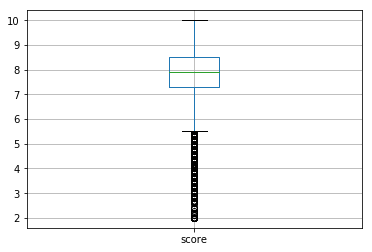

In [282]:
data7[['score']].boxplot()
plt.show()

In [283]:
data7.describe()

,id,score
count,153426.000000,153426.000000
mean,166519.703662,7.882241
std,116456.539851,0.885802
min,2.000000,2.000000
25%,64160.250000,7.300000
50%,150448.500000,7.900000
75%,254361.750000,8.500000
max,419816.000000,10.000000


In [284]:
(8.5-7.3)*1.5

1.8000000000000003

In [285]:
data7 = data7[(data7['score']<=10) & (data7['score']>5.5)]

In [286]:
len(data7)

152026

In [287]:
data7 = data7[(data7['numberofreviews']!='') & (data7['numberofreviews']!=None) ]

In [288]:
len(data7)

152026

In [306]:
numberofreviews7 = []
for numberofreview in data7['numberofreviews']:
    numberofreview = int(numberofreview)
    numberofreviews7.append(numberofreview)
data7['numberofreviews'] = numberofreviews7
len(numberofreviews7)

152026

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


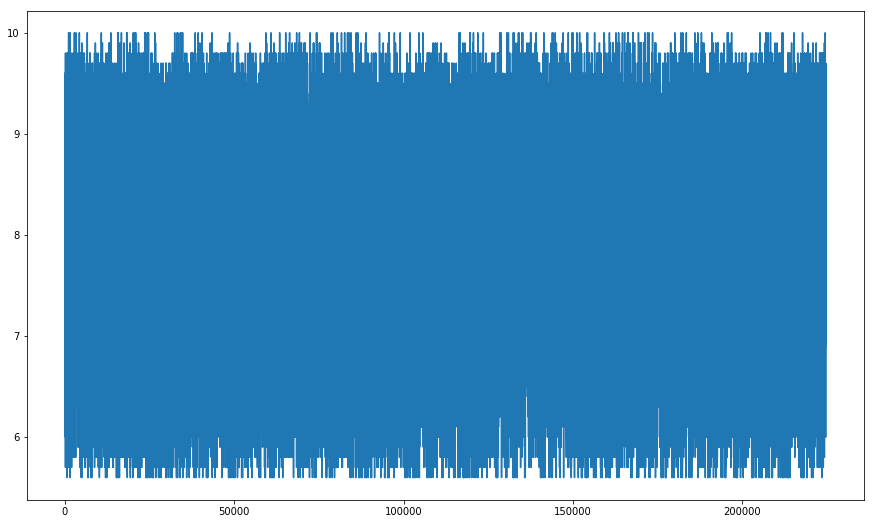

In [319]:
plt.figure(figsize=(15, 9))
data7['score'].plot()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


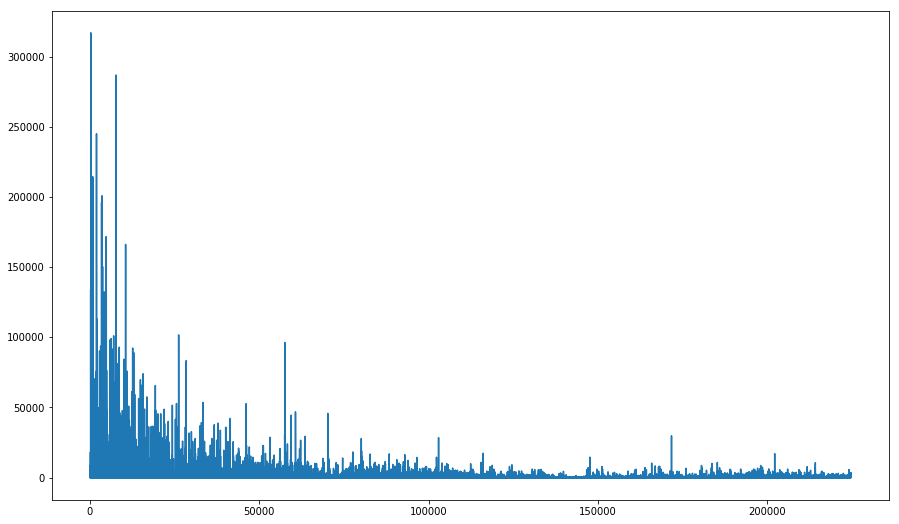

In [314]:
plt.figure(figsize=(15, 9))
data7['numberofreviews'].plot()
plt.show()

##### 结论：从上面两个图可知，评分高与评论数量之间没有太大的关系。